<a href="https://colab.research.google.com/github/pathilink/bemol_data_case/blob/main/notebooks/bemol_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#ee3e33>Bemol</font><font color=#0096d7>'s Technical Case | Data Analyst II</font>

## Dictionary

| Column | Description |
|-|-|
| Material | Unique code for each product. |
| descricao material | Product name. |
| gm3 | Merchandise category code to which each product belongs. |
| descricao gm3 | Merchandise category name. |
| id loja | Code of the shop where the sale was made.|
| nome loja | Name of the shop where the sale was made. |
| Cidade loja | City of origin of the shop. |
| UF | State of origin of the shop. |
| preco custo | Cost price (excluding freight) of the product. |
| Frete | Percentage of the freight price that must be applied to the cost price to obtain the total cost price of the product. |
| preco venda | Selling price of the product. |
| qtd vendida | Number of units sold on a given date. |
| data venda | Day of sale. |


## Libraries

In [1]:
import pandas as pd
import numpy as np # list
import datetime
import seaborn as sns # graph
%matplotlib inline
from matplotlib import pyplot as plt # plot

from google.colab import drive


In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2) # decimal
pd.set_option('float_format', '{:.2f}'.format) # scientific notation

## Data

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# upload data
df = pd.read_csv("drive/MyDrive/test/bemol/data/base_vendas_desafio.csv")
df.head()

,Material,descricao material,gm3,descricao gm3,id loja,Nome loja,Cidade loja,UF,preco custo,Frete,preco venda,qtd vendida,data venda
0,199592,OMELETEIRA BRINOX CLOVE 7111/470 CB,127,UTILIDADE DOMÉSTICA,114,PONTA NEGRA,MANAUS,AM,34.04,NaN,72.00,1,2021-10-09
1,201754,AR COND 7500 CONSUL CCN07EBA 127V,117,LINHA BRANCA,106,SHOPPING,MANAUS,AM,1015.91,0.01,1242.00,1,2021-07-21
2,206768,GELADEIRA CONTINENTAL FF 472L TC56 BR,117,LINHA BRANCA,115,CIDADE NOVA,MANAUS,AM,1497.31,0.0,2944.00,1,2021-06-03
3,218944,CENTRO DE MESA RICAELLE MOGLIA PRATP069,127,UTILIDADE DOMÉSTICA,118,CAMAPUA,MANAUS,AM,152.29,0.0,339.00,1,2023-05-26
4,209714,VENT DE MESA ARNO USF 50 VD50 PT,111,ELETROPORTÁTEIS,105,EDUCANDOS,MANAUS,AM,163.40,NaN,389.00,1,2020-12-10


In [5]:
print('The dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataframe has 51000 rows and 13 columns.


In [6]:
# data information
df.info() #verbose=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Material            51000 non-null  int64  
 1   descricao material  51000 non-null  object 
 2   gm3                 51000 non-null  int64  
 3   descricao gm3       51000 non-null  object 
 4   id loja             51000 non-null  int64  
 5   Nome loja           51000 non-null  object 
 6   Cidade loja         51000 non-null  object 
 7   UF                  51000 non-null  object 
 8   preco custo         51000 non-null  float64
 9   Frete               31775 non-null  object 
 10  preco venda         51000 non-null  float64
 11  qtd vendida         51000 non-null  int64  
 12  data venda          51000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


In [7]:
# list unique values per column
value_list = []
unique_list = []

for col in df:
  value_list.append(col)
  unique_list.append(df[col].unique())

# list(zip(col_list, unique_list))
df_unique = pd.DataFrame(
    {'column': value_list,
     'nunique': unique_list
     }
)

df_unique

,column,nunique
0,Material,"[199592, 201754, 206768, 218944, 209714, 21975..."
1,descricao material,"[OMELETEIRA BRINOX CLOVE 7111/470 CB, AR COND ..."
2,gm3,"[127, 117, 111, 126, 130, 105, 102, 120, 101, ..."
3,descricao gm3,"[UTILIDADE DOMÉSTICA, LINHA BRANCA, ELETROPORT..."
4,id loja,"[114, 106, 115, 118, 105, 117, 121, 120, 102, ..."
5,Nome loja,"[PONTA NEGRA, SHOPPING, CIDADE NOVA, CAMAPUA, ..."
6,Cidade loja,"[MANAUS, PORTO VELHO, BOA VISTA, COARI, JI-PAR..."
7,UF,"[AM, RO, RR, amazonas, AC]"
8,preco custo,"[34.04, 1015.91, 1497.31, 152.29, 163.4, 947.6..."
9,Frete,"[nan, 0.01, 0.0, 0.0%, 0.18, 0.02, 0.15, 0.08,..."


## Data preparation

In [8]:
# copy df
df_prep = df.copy()

In [9]:
# rename columns

df_prep.rename(columns={
    'Material': 'material',
    'descricao material': 'descricao_material',
    # 'gm3': 'gm3',
    'descricao gm3': 'descricao_gm3',
    'id loja': 'id_loja',
    'Nome loja': 'nome_loja',
    'Cidade loja': 'cidade_loja',
    'UF': 'uf',
    'preco custo': 'preco_custo',
    'Frete': 'frete',
    'preco venda': 'preco_venda',
    'qtd vendida': 'qtd_vendida',
    'data venda': 'data_venda'
    }, inplace=True)

In [10]:
# transform object into datetime - format 'yyy-mm-dd'
df_prep['data_venda'] = pd.to_datetime(df_prep['data_venda'], format='%Y-%m-%d')

# check type
print(df_prep['data_venda'].dtypes)

datetime64[ns]


In [11]:
# replace 'amazonas' --> 'AM'
df_prep['uf'] = df_prep['uf'].replace('amazonas', 'AM')

# check
df_prep['uf'].unique()

array(['AM', 'RO', 'RR', 'AC'], dtype=object)

In [12]:
# replace NaN, % and alter data type
df_prep['frete'] = df_prep['frete'].fillna('0.0').str.replace('%', '').astype(float)

# check
df_prep['frete'].unique()

array([0.  , 0.01, 0.18, 0.02, 0.15, 0.08, 0.21, 0.13, 0.07, 0.22, 0.23,
       0.28, 0.03, 0.11, 0.04, 0.06, 0.27, 0.1 , 0.14, 0.16, 0.09, 0.19,
       0.05, 0.25, 0.17, 0.12, 0.2 , 0.24, 0.3 , 0.31, 0.38, 0.29, 0.26,
       0.73, 0.35, 0.32])

In [13]:
# alter column type
df_prep['material'] = df_prep['material'].astype(str)

# check
print(df_prep['material'].dtypes)

object


In [14]:
# alter column type
df_prep['gm3'] = df_prep['gm3'].astype(str)

# check
print(df_prep['gm3'].dtypes)

object


In [15]:
# alter column type
df_prep['id_loja'] = df_prep['id_loja'].astype(str)

# check
print(df_prep['id_loja'].dtypes)

object


In [16]:
df_prep.sample(5)

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda
11179,203942,SMARTPHONE LG K40S 32GB PT,126,TELEFONIA,102,ONLINE,MANAUS,AM,462.94,0.00,809.00,1,2020-06-16
2214,208165,MOUSE S/F LOGITECH WIRELLESS M190 VM,114,INFORMÁTICA,120,PONTA NEGRA SHOPPING,MANAUS,AM,39.23,0.00,76.00,1,2021-09-17
18514,194089,ROUP 6P/3G KAPPESBERG S482 JCR,120,MÓVEIS,102,ONLINE,MANAUS,AM,471.41,0.00,134400.00,1,2021-09-06
26510,231796,HEADPHONE PHILIPS TAUH201BK/00 PT,102,ÁUDIO,106,SHOPPING,MANAUS,AM,42.00,0.00,79.00,1,2024-03-30
7863,192861,CHIP TIM PRÉ PLANO NAKED 4G,126,TELEFONIA,531,AUTAZES,AUTAZES,AM,2.64,0.00,6.00,1,2023-06-05


In [17]:
# iteration: exclude extreme values of preco_venda0
df_prep = df_prep.query('preco_venda <= 10000')

## Exploratory Data Analysis

In [18]:
# create horizontal bar graph grouping by categorical

def graph_category(y, x, df, title):
    """
    Plots a bar chart to visualize data distribution.

    Args:
        y (str): The name of the column in the DataFrame to be used for the y-axis (values to be plotted).
        x (str): The name of the column in the DataFrame to be used for the x-axis (categories).
        df (pd.DataFrame): The DataFrame containing the data to be plotted.
        title (str): The title of the chart.

    Returns:
        None: The function does not return anything. It only displays the chart.

    Example:
        >>> import pandas as pd
        >>> data = {'Category': ['A', 'B', 'C'], 'Values': [10, 20, 15]}
        >>> df = pd.DataFrame(data)
        >>> graph_category(y='Values', x='Category', df=df, title='Bar Chart')
    """

    plt.figure(figsize=(9, 5))
    ax=sns.barplot(y=y, x=x, data=df.round(2), color='#0096d7')

    plt.title(title)
    ax.bar_label(ax.containers[0])
    ax.set(xticklabels=[])
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    ax.tick_params(left=False)
    ax.tick_params(bottom=False)

### Date variable

In [19]:
# range of data

print("Minimum date:", df_prep.data_venda.min())
print("Maximum date:", df_prep.data_venda.max())

Minimum date: 2020-05-01 00:00:00
Maximum date: 2024-04-30 00:00:00


In [20]:
# create column
df_prep['dia_semanal'] = df_prep['data_venda'].dt.strftime('%a')


In [21]:
# number of occurrences per 'weekly_day'
contagem_por_dia = df_prep.groupby('dia_semanal')['data_venda'].count().reset_index(name='contagem')

# total number
total_ocorrencias = contagem_por_dia['contagem'].sum()

# percentage
contagem_por_dia['percentual'] = (contagem_por_dia['contagem'] / total_ocorrencias) * 100
contagem_por_dia

,dia_semanal,contagem,percentual
0,Fri,7528,14.99
1,Mon,7289,14.51
2,Sat,9102,18.12
3,Sun,4109,8.18
4,Thu,7440,14.81
5,Tue,7398,14.73
6,Wed,7363,14.66


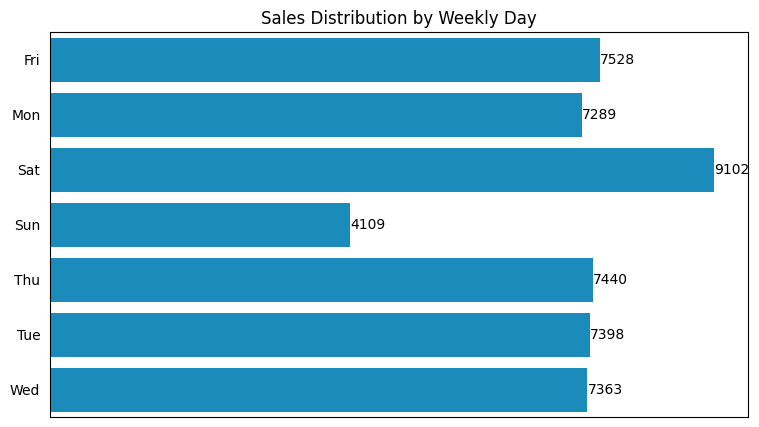

In [22]:
graph_category(y='dia_semanal', x='data_venda', df=df_prep.groupby('dia_semanal')['data_venda'].count().reset_index(), title='Sales Distribution by Weekly Day')

### Quantitative variables

In [23]:
df_prep[['preco_custo', 'frete', 'preco_venda', 'qtd_vendida']].describe()

,preco_custo,frete,preco_venda,qtd_vendida
count,50229.00,50229.00,50229.00,50229.00
mean,386.12,0.01,725.54,1.06
std,589.61,0.04,1058.85,0.52
min,0.93,0.00,5.00,0.00
25%,30.78,0.00,68.00,1.00
50%,98.34,0.00,209.00,1.00
75%,575.29,0.00,1099.00,1.00
max,8005.23,0.73,9999.00,50.00


**preco_custo:**

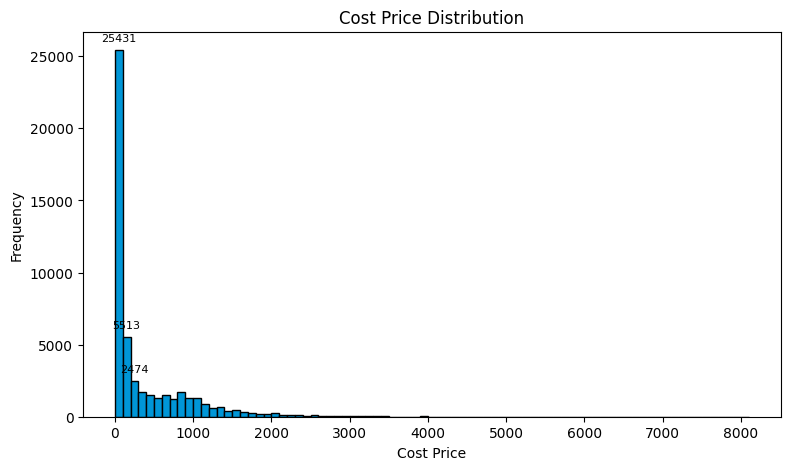

In [24]:
#  filtering to exclude extreme values
preco_custo_filtered = df_prep#.query('preco_custo <= 10000')

plt.figure(figsize=(9, 5))

# calculate bins limits every 100
bins = np.arange(preco_custo_filtered['preco_custo'].min(), preco_custo_filtered['preco_custo'].max() + 100, 100)

# histogram
ax = plt.hist(preco_custo_filtered['preco_custo'], bins=bins, edgecolor='black', color='#0096d7')

# Identificando as 3 maiores barras
n_barras = len(ax[0])
valores_barras = ax[0]
indices_maiores = np.argsort(valores_barras)[-3:]

# label only the 3 first
for i in indices_maiores:
    rect = ax[2][i]  # ax[2] contém os patches (barras) do histograma
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom', fontsize=8)

plt.xlabel('Cost Price')
plt.ylabel('Frequency')
plt.title('Cost Price Distribution')

plt.show()

# Mode: products cost <= R$100

In [25]:
# create bins
bins = np.arange(df_prep['preco_custo'].min(), df_prep['preco_custo'].max() + 100, 100)

# bin count
contagem_custo, edges = np.histogram(df_prep['preco_custo'], bins=bins)

total_ocorrencias_custo = contagem_custo.sum()

percentuais = (contagem_custo / total_ocorrencias_custo) * 100

bin_contagem_custo = pd.DataFrame({
    'bin': [f'{edges[i]} - {edges[i+1]}' for i in range(len(contagem_custo))],
    'contagem': contagem_custo,
    'percentual': percentuais
})

bin_contagem_custo.sort_values(by='percentual', ascending=False).head()



,bin,contagem,percentual
0,0.93 - 100.93,25431,50.63
1,100.93 - 200.93,5513,10.98
2,200.93 - 300.93,2474,4.93
8,800.93 - 900.93,1718,3.42
3,300.93 - 400.93,1707,3.40


**frete:**

In [26]:
df_prep.query('frete >= 0.73')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,dia_semanal
2832,212841,CAPA ELECTROLUX P/LAVADORAS 10 A 16KG BR,127,UTILIDADE DOMÉSTICA,117,MILLENNIUM,MANAUS,AM,28.53,0.73,66.00,2,2023-12-15,Fri
20219,220981,KIT POTE ELECTROLUX HERM C/T A23122901,127,UTILIDADE DOMÉSTICA,102,ONLINE,MANAUS,AM,70.66,0.73,164.00,1,2024-01-09,Tue
23494,182963,KIT SACO ELECTROLUX P/ASPIRAD SBEON,111,ELETROPORTÁTEIS,102,ONLINE,MANAUS,AM,8.31,0.73,32.00,1,2024-02-14,Wed
26705,93475,KIT SACO ELECTROLUX P/ASPIRAD A10 CSE10,111,ELETROPORTÁTEIS,202,PORTO VELHO SHOPPING,PORTO VELHO,RO,10.08,0.73,24.00,1,2023-12-12,Tue
30036,212832,MARMITA ELECTROLUX LUN BOX A15338601 PT,127,UTILIDADE DOMÉSTICA,102,ONLINE,MANAUS,AM,14.64,0.73,36.00,1,2023-12-07,Thu
36217,93475,KIT SACO ELECTROLUX P/ASPIRAD A10 CSE10,111,ELETROPORTÁTEIS,116,STUDIO5,MANAUS,AM,10.08,0.73,24.00,1,2023-12-05,Tue
40415,220981,KIT POTE ELECTROLUX HERM C/T A23122901,127,UTILIDADE DOMÉSTICA,115,CIDADE NOVA,MANAUS,AM,70.66,0.73,164.00,1,2024-01-10,Wed
46941,93475,KIT SACO ELECTROLUX P/ASPIRAD A10 CSE10,111,ELETROPORTÁTEIS,204,JATUARANA,PORTO VELHO,RO,10.08,0.73,38.00,1,2024-01-13,Sat


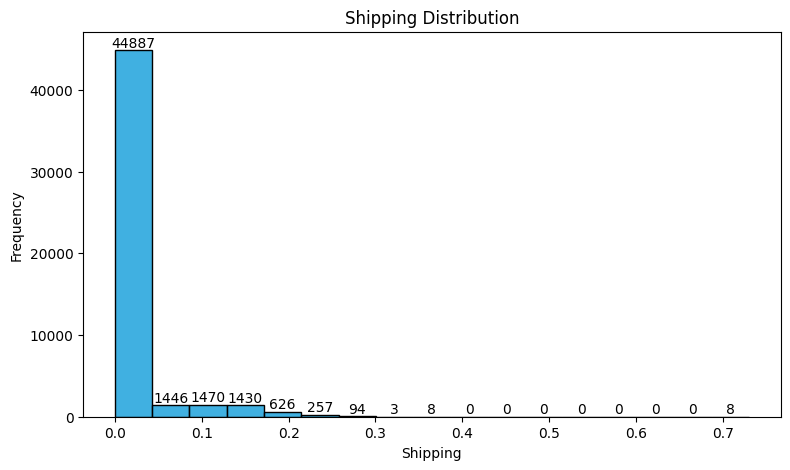

In [27]:
plt.figure(figsize=(9, 5))
ax=sns.histplot(data=df_prep, x='frete', color='#0096d7')
ax.bar_label(ax.containers[0])
plt.xlabel('Shipping')
plt.ylabel('Frequency')
plt.title('Shipping Distribution')

plt.show()

In [28]:
# number of occurrences
contagem_por_frete = df_prep.groupby('frete')['data_venda'].count().reset_index(name='contagem')

# total number
total_ocorrencias_frete = contagem_por_frete['contagem'].sum()

# percentage
contagem_por_frete['percentual'] = (contagem_por_frete['contagem'] / total_ocorrencias_frete) * 100
contagem_por_frete.sort_values(by='percentual').tail()

,frete,contagem,percentual
6,0.06,408,0.81
11,0.11,493,0.98
14,0.14,582,1.16
1,0.01,3094,6.16
0,0.00,41106,81.84


**preco_venda:**

In [29]:
df_prep.query('preco_venda >= 10000').sort_values(by='preco_venda').tail(10)

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,dia_semanal


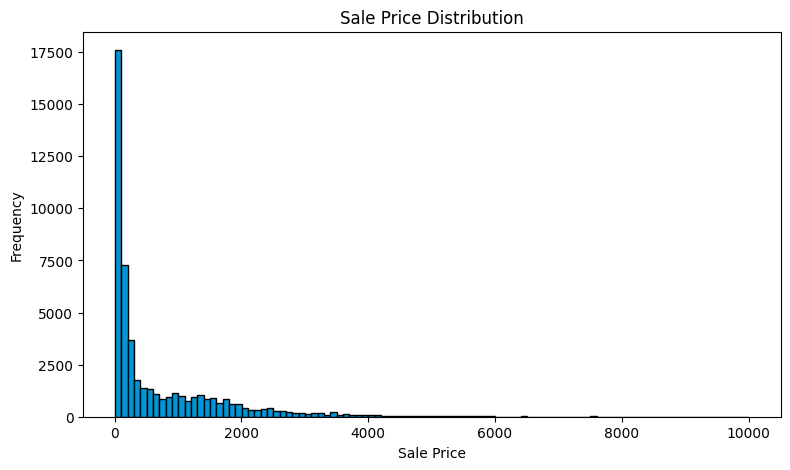

In [30]:
#  filtering to exclude extreme values
preco_venda_filtered = df_prep#.query('preco_venda <= 10000')

plt.figure(figsize=(9, 5))

# Calculate bins limits every 100
bins = np.arange(preco_venda_filtered['preco_venda'].min(), preco_venda_filtered['preco_venda'].max() + 100, 100)

# Histogram
ax = plt.hist(preco_venda_filtered['preco_venda'], bins=bins, edgecolor='black', color='#0096d7')

plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')

plt.show()

# Mode: products sale <= R$100

**qtd_vendida:**

In [31]:
df_prep.query('qtd_vendida >= 30')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,dia_semanal
17458,209356,CHIP VIVO 4G GIGA P60 YGSC244U5000,126,TELEFONIA,106,SHOPPING,MANAUS,AM,4.20,0.00,12.00,50,2023-12-26,Tue
24918,60556,CADEIRA TRAMONTINA TORRES 92015/010 BR,120,MÓVEIS,103,AVENIDA,MANAUS,AM,30.02,0.00,64.00,30,2021-11-07,Sun
38819,203702,SANDUICHEIRA GRILL MONDIAL S-20 IN/PT,111,ELETROPORTÁTEIS,101,MATRIZ,MANAUS,AM,45.10,0.00,79.00,30,2020-10-02,Fri


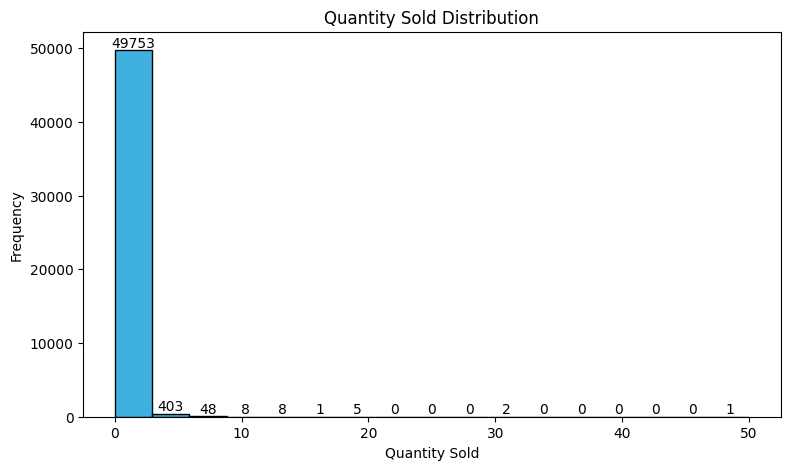

In [32]:
plt.figure(figsize=(9, 5))
ax=sns.histplot(data=df_prep, x='qtd_vendida', color='#0096d7')
ax.bar_label(ax.containers[0])
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.title('Quantity Sold Distribution')

plt.show()

# Mode: qtde == 1

### Qualitative variables

**nome_loja:**

In [33]:
loja_qtd_vendida = df_prep.groupby('nome_loja')['qtd_vendida'].sum().reset_index()
top10 = loja_qtd_vendida.sort_values(by='qtd_vendida', ascending=False).head(10)
top10

,nome_loja,qtd_vendida
62,ONLINE,7822
11,CIDADE NOVA,3461
9,CAMAPUA,3347
72,SHOPPING,3311
51,GRANDE CIRCULAR,3237
58,MANAUARA,2974
64,PONTA NEGRA,2848
3,AVENIDA,2568
61,NOVA CIDADE,2488
75,TORQUATO,2400


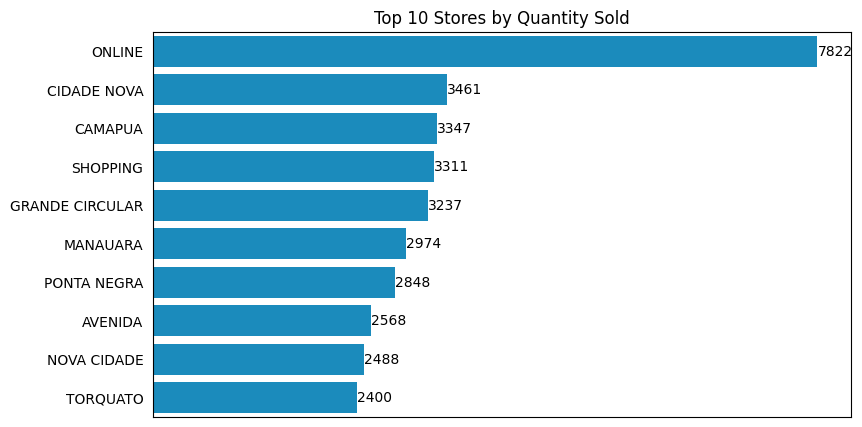

In [34]:
graph_category(y='nome_loja', x='qtd_vendida', df=top10, title='Top 10 Stores by Quantity Sold')

In [35]:
# group by 'nome_loja' em 'ONLINE' & 'FISICA'
loja_qtd_vendida = df_prep.groupby(df_prep['nome_loja'].apply(lambda x: 'ONLINE' if x == 'ONLINE' else 'FISICA'))['qtd_vendida'].sum().reset_index(name='total_vendas')

# total number
total_qtd_vendida = loja_qtd_vendida['total_vendas'].sum()

loja_qtd_vendida['percentual'] = (loja_qtd_vendida['total_vendas'] / total_qtd_vendida) * 100

loja_qtd_vendida

,nome_loja,total_vendas,percentual
0,FISICA,45494,85.33
1,ONLINE,7822,14.67


**descricao_gm3:**

In [36]:
gm3_qtd_vendida = df_prep.groupby('descricao_gm3')['qtd_vendida'].sum().reset_index()

# total number
total_gm3_qtd_vendida = gm3_qtd_vendida['qtd_vendida'].sum()

gm3_qtd_vendida['percentual'] = (gm3_qtd_vendida['qtd_vendida'] / total_gm3_qtd_vendida) * 100

# gm3_qtd_vendida

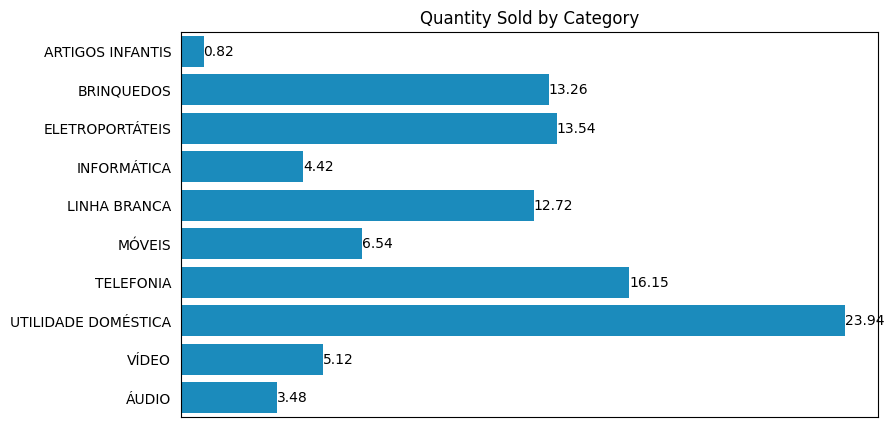

In [37]:
graph_category(y='descricao_gm3', x='percentual', df=gm3_qtd_vendida.round(2), title='Quantity Sold by Category')

**cidade_loja:**

In [38]:
cidade_qtd_vendida = df_prep.groupby('cidade_loja')['qtd_vendida'].sum().reset_index()

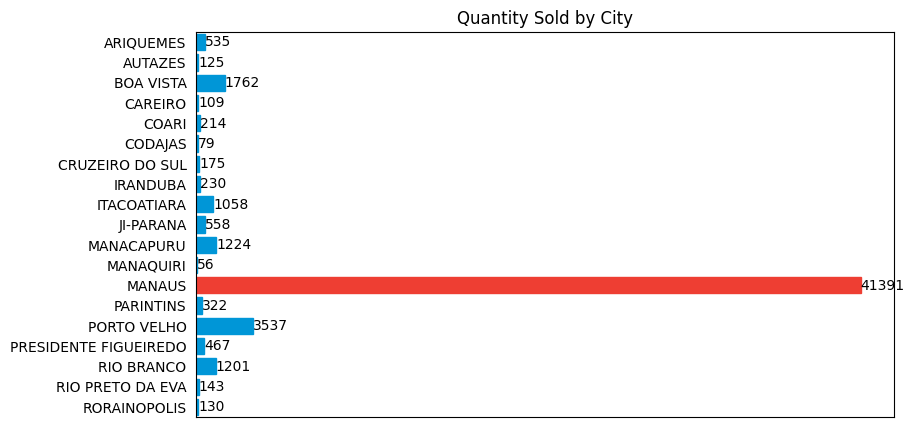

In [39]:
plt.figure(figsize=(9, 5))

ax = sns.barplot(y='cidade_loja', x='qtd_vendida', data=cidade_qtd_vendida)

# colors
highlight_color = '#ee3e33'
default_color = '#0096d7'

# highlight MANAUS
for p in ax.patches:
    cidade = p.get_y() + p.get_height() / 2  # obtaining the central position of the bar on the y-axis
    cidade_name = cidade_qtd_vendida.iloc[int(cidade)]['cidade_loja']

    if cidade_name == 'MANAUS':
        p.set_color(highlight_color)
    else:
        p.set_color(default_color)

plt.title('Quantity Sold by City')
ax.bar_label(ax.containers[0])
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

plt.show()


**uf:**

In [40]:
uf_qtd_vendida = df_prep.groupby('uf')['qtd_vendida'].sum().reset_index()

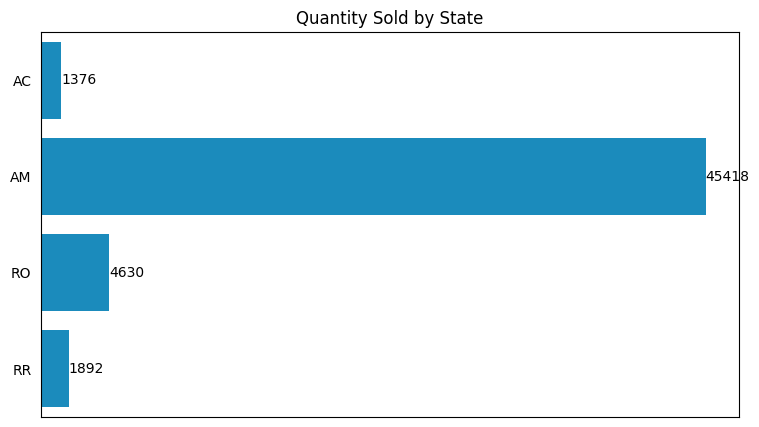

In [41]:
graph_category(y='uf', x='qtd_vendida', df=uf_qtd_vendida, title='Quantity Sold by State')

### Financial variables

In [42]:
df_prep['valor_frete'] = df_prep['preco_custo'] * df_prep['frete']

df_prep['preco_custo_total'] = df_prep['preco_custo'] + df_prep['valor_frete']

df_prep['receita'] = df_prep['preco_venda'] * df_prep['qtd_vendida']

df_prep['custo'] = df_prep['preco_custo_total'] * df_prep['qtd_vendida']

df_prep['margem_lucro_financeira'] = df_prep['receita'] - df_prep['custo']

df_prep['margem_lucro_percentual'] = (df_prep['margem_lucro_financeira'] / df_prep['receita']) * 100


In [43]:
df_prep['margem_lucro_financeira'].describe()

,margem_lucro_financeira
count,50229.00
mean,340.25
std,611.51
min,-147.49
25%,35.90
50%,110.62
75%,466.54
max,23280.69


In [44]:
total_registros = len(df_prep)

contagem_positiva = (df_prep['margem_lucro_percentual'] > 0).sum()
contagem_negativa = (df_prep['margem_lucro_percentual'] <= 0).sum()

percentual_positivo = ((contagem_positiva / total_registros) * 100).round(2)
percentual_negativo = ((contagem_negativa / total_registros) * 100).round(2)

print('Positive profit margin:', percentual_positivo)
print('Negative profit margin:', percentual_negativo)

Positive profit margin: 99.53
Negative profit margin: 0.09


In [45]:
# total sales for the whole period
df_prep[df_prep['margem_lucro_financeira'] > 0]['margem_lucro_financeira'].sum().round(2)

17092038.53

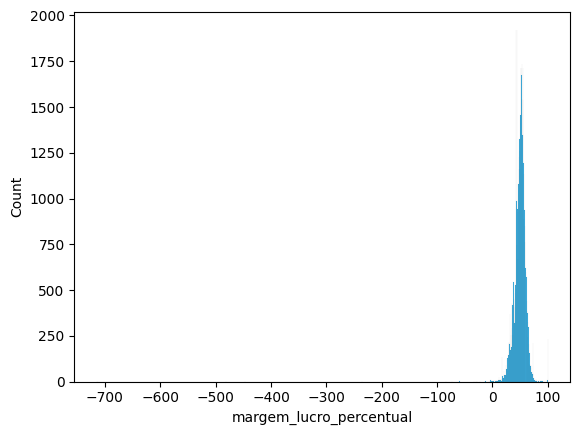

In [46]:
sns.histplot(data=df_prep, x='margem_lucro_percentual', color='#0096d7');

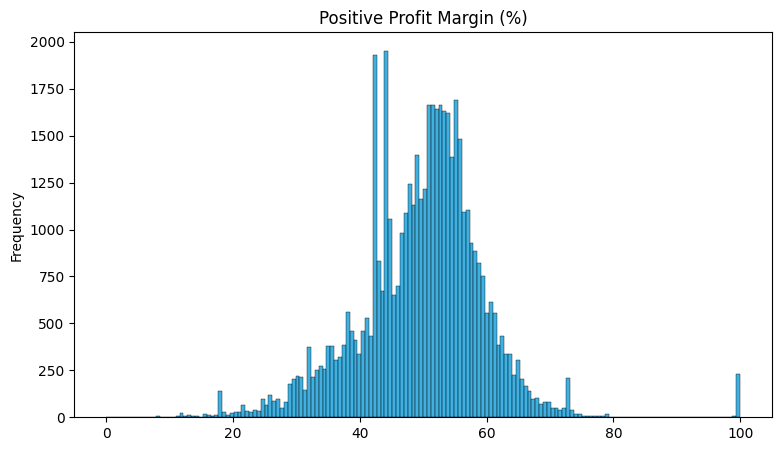

In [47]:
plt.figure(figsize=(9, 5))
ax=sns.histplot(data=df_prep.query('margem_lucro_percentual >= 0'), x='margem_lucro_percentual', color='#0096d7')
plt.title('Positive Profit Margin (%)')
plt.ylabel('Frequency')
ax.set(xlabel=None);

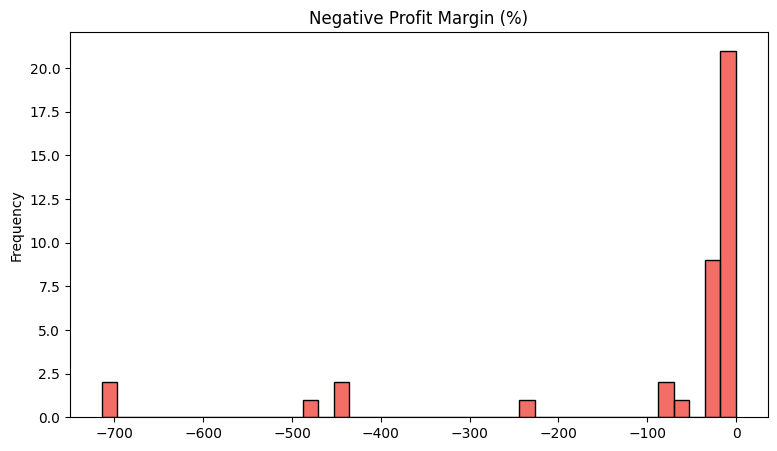

In [48]:
plt.figure(figsize=(9, 5))
ax=sns.histplot(data=df_prep.query('margem_lucro_percentual < 0'), x='margem_lucro_percentual', color='#ee3e33')
plt.title('Negative Profit Margin (%)')
plt.ylabel('Frequency')
ax.set(xlabel=None);

**descricao_gm3**

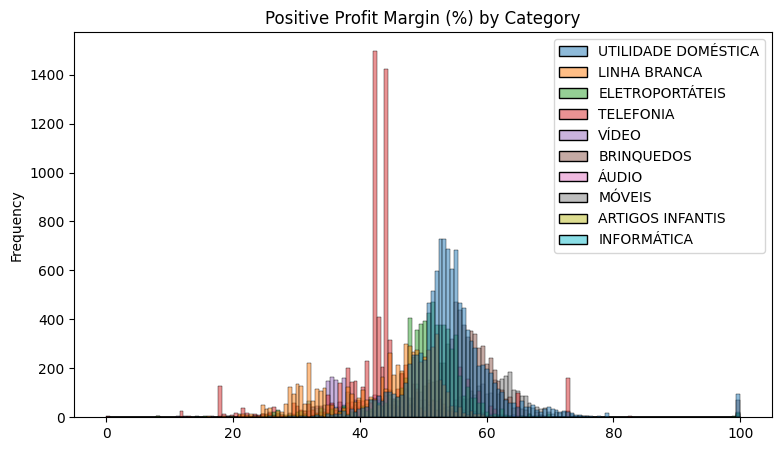

In [49]:
plt.figure(figsize=(9, 5))
ax=sns.histplot(data=df_prep.query('margem_lucro_percentual >= 0'), x='margem_lucro_percentual', hue='descricao_gm3', color='#0096d7')
plt.title('Positive Profit Margin (%) by Category')
plt.ylabel('Frequency')
ax.get_legend().set_title(None)
ax.set(xlabel=None);

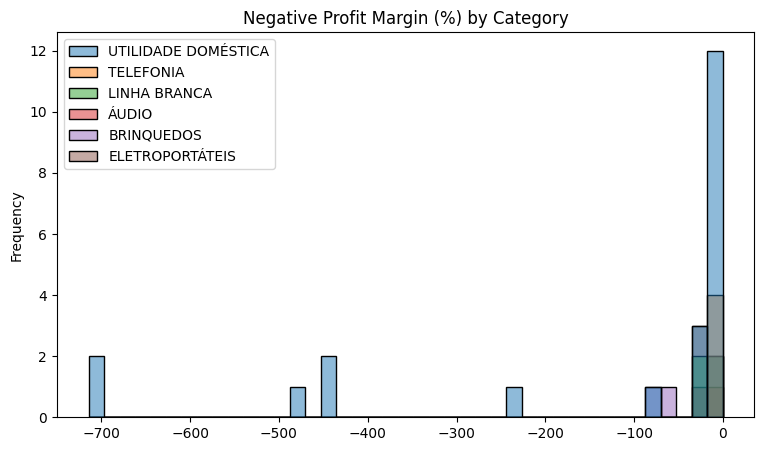

In [50]:
plt.figure(figsize=(9, 5))
ax=sns.histplot(data=df_prep.query('margem_lucro_percentual < 0'), x='margem_lucro_percentual', hue='descricao_gm3')
plt.title('Negative Profit Margin (%) by Category')
plt.ylabel('Frequency')
ax.get_legend().set_title(None)
ax.set(xlabel=None);

In [51]:
descricao_gm3_lucro_percentual = df_prep.groupby('descricao_gm3')['margem_lucro_percentual']\
                                        .mean().reset_index()\
                                        .sort_values(by='margem_lucro_percentual', ascending=False)\
                                        .rename(columns={
                                                        'descricao_gm3': 'Category',
                                                        'margem_lucro_percentual': 'Average profit margin (%)'
                                                    })

descricao_gm3_lucro_percentual

,Category,Average profit margin (%)
5,MÓVEIS,59.84
1,BRINQUEDOS,55.89
0,ARTIGOS INFANTIS,55.84
7,UTILIDADE DOMÉSTICA,53.93
2,ELETROPORTÁTEIS,50.29
9,ÁUDIO,45.37
6,TELEFONIA,43.94
4,LINHA BRANCA,43.56
3,INFORMÁTICA,42.41
8,VÍDEO,42.25


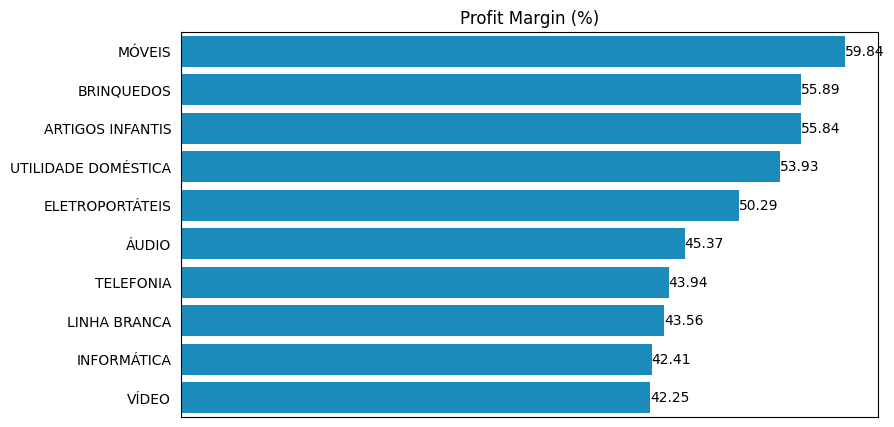

In [52]:
graph_category(y='Category', x='Average profit margin (%)', df=descricao_gm3_lucro_percentual, title='Profit Margin (%)')

**nome_loja**

In [53]:
loja_margem = df_prep.groupby('nome_loja')['margem_lucro_percentual'].mean().reset_index()
top10_margem = loja_margem.sort_values(by='margem_lucro_percentual', ascending=False).head(10)
top10_margem

,nome_loja,margem_lucro_percentual
41,FARMACIA PONTA NEGRA,72.67
16,FARMACIA AVENIDA,72.67
36,FARMACIA MATRIZ,72.67
33,FARMACIA JI-PARANA,72.67
28,FARMACIA FRANCESES,72.67
27,FARMACIA EDUCANDOS,72.67
25,FARMACIA DOM PEDRO,72.67
48,FARMACIA STUDIO 5,72.67
20,FARMACIA CAREIRO,72.67
18,FARMACIA BOULEVARD,72.67


In [54]:
df_prep.query('nome_loja == "FARMACIA AVENIDA"')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,dia_semanal,valor_frete,preco_custo_total,receita,custo,margem_lucro_financeira,margem_lucro_percentual
20311,197101,CHIP CLARO PRÉ-PAGO TC 128KB AAC006,126,TELEFONIA,620,FARMACIA AVENIDA,MANAUS,AM,2.46,0.00,9.00,1,2023-09-03,Sun,0.00,2.46,9.00,2.46,6.54,72.67
22397,197101,CHIP CLARO PRÉ-PAGO TC 128KB AAC006,126,TELEFONIA,620,FARMACIA AVENIDA,MANAUS,AM,2.46,0.00,9.00,1,2023-12-04,Mon,0.00,2.46,9.00,2.46,6.54,72.67


In [55]:
# check category
farmacia_df = df_prep[df_prep['nome_loja'].str.contains('FARMACIA')]

farmacia_df_resultado = farmacia_df.groupby(['nome_loja', 'descricao_gm3'])['qtd_vendida'].sum().reset_index()
farmacia_df_resultado.head()

,nome_loja,descricao_gm3,qtd_vendida
0,FARMACIA AVENIDA,TELEFONIA,2
1,FARMACIA BOA VISTA,TELEFONIA,1
2,FARMACIA BOULEVARD,TELEFONIA,1
3,FARMACIA CAMAPUA,TELEFONIA,9
4,FARMACIA CAREIRO,TELEFONIA,2


In [56]:
df_prep[['descricao_gm3', 'nome_loja']].query('descricao_gm3 == "TELEFONIA"')

,descricao_gm3,nome_loja
5,TELEFONIA,CIDADE NOVA
13,TELEFONIA,SHOPPING
16,TELEFONIA,ATAIDE TEIVE
17,TELEFONIA,CAMAPUA
24,TELEFONIA,MATRIZ
...,...,...
50973,TELEFONIA,ONLINE
50982,TELEFONIA,CODAJAS
50990,TELEFONIA,NOVA CIDADE
50991,TELEFONIA,EDUCANDOS


💡 The stores with the highest profit margin (73%) are pharmacies, but they only sell one type of product: cell phone chips.

**cidade_loja**

In [57]:
cidade_loja_lucro_percentual = df_prep.groupby('cidade_loja')['margem_lucro_percentual'].mean().reset_index()

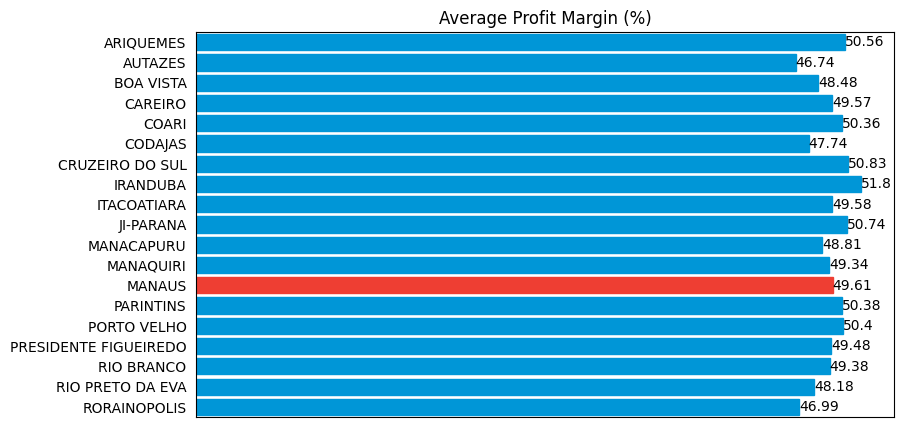

In [58]:
plt.figure(figsize=(9, 5))

ax = sns.barplot(y='cidade_loja', x='margem_lucro_percentual', data=cidade_loja_lucro_percentual.round(2))

highlight_color = '#ee3e33'
default_color = '#0096d7'

for p in ax.patches:
    cidade = p.get_y() + p.get_height() / 2
    cidade_name = cidade_loja_lucro_percentual.iloc[int(cidade)]['cidade_loja']

    if cidade_name == 'MANAUS':
        p.set_color(highlight_color)
    else:
        p.set_color(default_color)

plt.title('Average Profit Margin (%)')
ax.bar_label(ax.containers[0])
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

plt.show()


In [59]:
cidade_loja_lucro_financeira = df_prep.groupby('cidade_loja')['margem_lucro_financeira'].mean().reset_index()

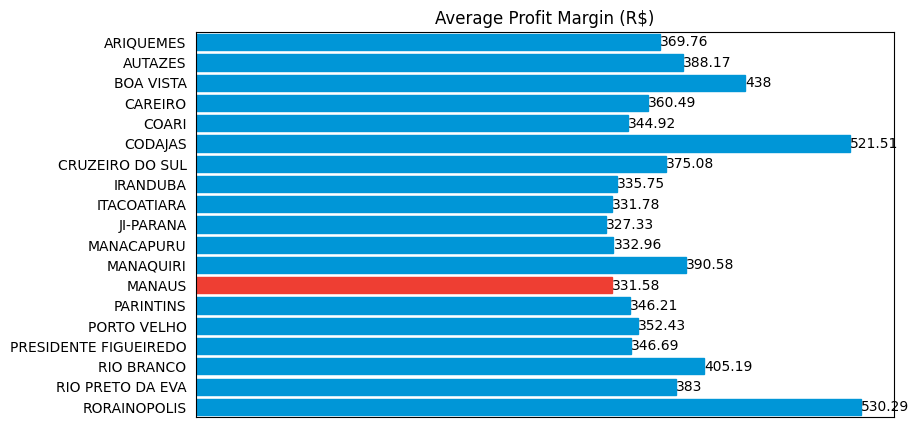

In [60]:
plt.figure(figsize=(9, 5))

ax = sns.barplot(y='cidade_loja', x='margem_lucro_financeira', data=cidade_loja_lucro_financeira.round(2))

highlight_color = '#ee3e33'
default_color = '#0096d7'

for p in ax.patches:
    cidade = p.get_y() + p.get_height() / 2
    cidade_name = cidade_loja_lucro_financeira.iloc[int(cidade)]['cidade_loja']

    if cidade_name == 'MANAUS':
        p.set_color(highlight_color)
    else:
        p.set_color(default_color)

plt.title('Average Profit Margin (R$)')
ax.bar_label(ax.containers[0])
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

plt.show()

**uf**

In [61]:
uf_lucro_percentual = df_prep.groupby('uf')['margem_lucro_percentual'].mean().reset_index()

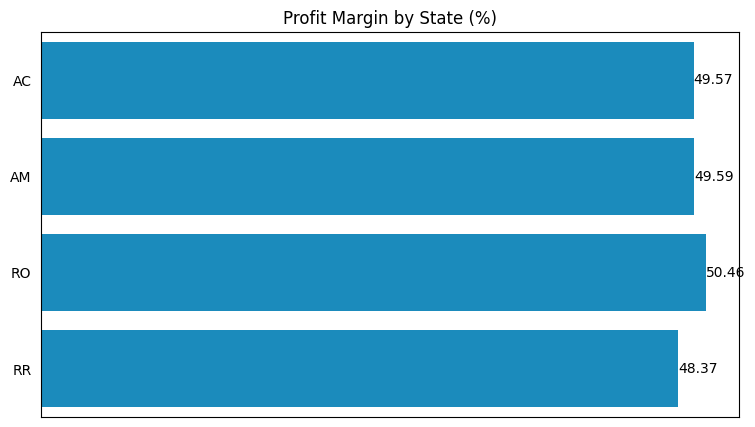

In [62]:
graph_category(y='uf', x='margem_lucro_percentual', df=uf_lucro_percentual, title='Profit Margin by State (%)')

### MANAUS

💡 Manaus has the largest number of products sold but, compared to other cities, it doesn't stand out in terms of percentage profit margin, but it does lag behind in terms of financial profit margin.

In [63]:
(df_prep.query('cidade_loja == "MANAUS"')
             .groupby('descricao_gm3')
             .agg({
                 'qtd_vendida': 'sum',
                 'margem_lucro_financeira': 'mean'
             })
             .round(2)
             .reset_index()
             .rename(columns={
                 'descricao_gm3': 'Category',
                 'qtd_vendida': 'Total',
                 'margem_lucro_financeira': 'Average Financial Profit Margin (R$)'
             })
             .sort_values(by='Average Financial Profit Margin (R$)', ascending=False)
             )


,Category,Total,Average Financial Profit Margin (R$)
4,LINHA BRANCA,5120,712.07
6,TELEFONIA,6615,583.52
5,MÓVEIS,2722,528.05
8,VÍDEO,2111,478.06
3,INFORMÁTICA,1740,463.52
9,ÁUDIO,1396,225.48
0,ARTIGOS INFANTIS,335,210.55
2,ELETROPORTÁTEIS,5643,155.08
1,BRINQUEDOS,5625,129.97
7,UTILIDADE DOMÉSTICA,10084,79.75


In [64]:
# compare

(df_prep.query('cidade_loja == "RORAINOPOLIS"')
             .groupby('descricao_gm3')
             .agg({
                 'qtd_vendida': 'sum',
                 'margem_lucro_financeira': 'mean'
             })
             .round(2)
             .reset_index()
             .rename(columns={
                 'descricao_gm3': 'Category',
                 'qtd_vendida': 'Total',
                 'margem_lucro_financeira': 'Average Financial Profit Margin (R$)'
             })
             .sort_values(by='Average Financial Profit Margin (R$)', ascending=False)
             )

,Category,Total,Average Financial Profit Margin (R$)
3,LINHA BRANCA,17,1123.06
5,TELEFONIA,57,636.17
7,VÍDEO,7,622.66
4,MÓVEIS,2,481.14
2,INFORMÁTICA,6,311.01
8,ÁUDIO,7,261.83
1,ELETROPORTÁTEIS,27,141.89
6,UTILIDADE DOMÉSTICA,6,74.74
0,BRINQUEDOS,1,16.14


In [65]:
# check
df_prep.query('cidade_loja == "RORAINOPOLIS" & descricao_gm3 == "LINHA BRANCA"')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,dia_semanal,valor_frete,preco_custo_total,receita,custo,margem_lucro_financeira,margem_lucro_percentual
5068,202808,LAVADORA 12 BRASTEMP BWK12ABANA BR,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1124.43,0.00,2316.00,1,2021-12-20,Mon,0.00,1124.43,2316.00,1124.43,1191.57,51.45
6298,120332,GELADEIRA CONSUL FF 300L CRB36ABA BR,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1132.81,0.00,2252.00,1,2021-07-15,Thu,0.00,1132.81,2252.00,1132.81,1119.19,49.70
13557,201753,AR COND 7500 CONSUL CCB07EBB 220V,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1087.73,0.01,1588.00,1,2023-03-06,Mon,10.88,1098.61,1588.00,1098.61,489.39,30.82
13903,212892,GELADEIRA CONSUL FF 410L CRM50HKANA CZ,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1779.18,0.00,3236.00,1,2021-08-28,Sat,0.00,1779.18,3236.00,1779.18,1456.82,45.02
18367,218360,FOGÃO 5B MUELLER DECORATO MESA INOX PT,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,766.71,0.16,1738.00,1,2024-01-17,Wed,122.67,889.38,1738.00,889.38,848.62,48.83
18800,192150,GELADEIRA ELECTROLUX FF 371L DFN41 BR,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1678.96,0.13,3419.00,1,2023-02-17,Fri,218.26,1897.22,3419.00,1897.22,1521.78,44.51
23259,210669,SPLIT 12000 GREE GWC12QC-D3NNB4D/I 220V,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1231.25,0.00,2048.00,1,2022-05-10,Tue,0.00,1231.25,2048.00,1231.25,816.75,39.88
23304,194468,GELADEIRA BRASTEMP FF 375L BRM44HKANA IN,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,1878.78,0.14,3944.00,1,2023-08-21,Mon,263.03,2141.81,3944.00,2141.81,1802.19,45.69
30064,207936,FOGÃO 5B MUELLER PIACERE VETRO PT,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,825.74,0.16,1724.00,1,2023-05-16,Tue,132.12,957.86,1724.00,957.86,766.14,44.44
33831,199324,GELADEIRA ELECTROLUX FF DF56 474L BR,117,LINHA BRANCA,703,RORAINOPOLIS,RORAINOPOLIS,RR,2782.00,0.00,5312.00,1,2022-11-18,Fri,0.00,2782.00,5312.00,2782.00,2530.00,47.63


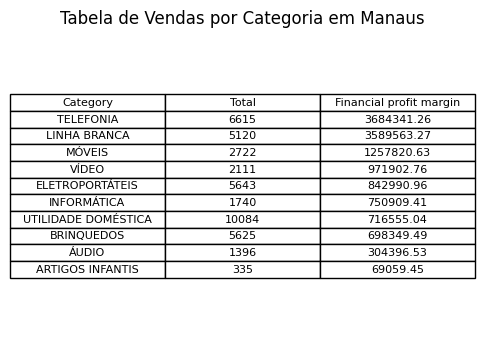

In [66]:

# df
df_result = (df_prep.query('cidade_loja == "MANAUS"')
             .groupby('descricao_gm3')[['qtd_vendida', 'margem_lucro_financeira']]
             .sum().round(2)
             .reset_index()
             .rename(columns={'descricao_gm3': 'Category', 'qtd_vendida': 'Total', 'margem_lucro_financeira': 'Financial profit margin'})
             .sort_values(by='Financial profit margin', ascending=False)
             )

# plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('tight')
ax.axis('off')
table_data = df_result.values
column_labels = df_result.columns

plt.title("Tabela de Vendas por Categoria em Manaus")

# create table
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

plt.show()


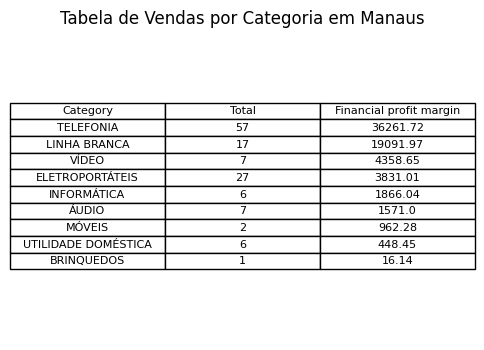

In [67]:
# df
df_result = (df_prep.query('cidade_loja == "RORAINOPOLIS"')
             .groupby('descricao_gm3')[['qtd_vendida', 'margem_lucro_financeira']]
             .sum().round(2)
             .reset_index()
             .rename(columns={'descricao_gm3': 'Category', 'qtd_vendida': 'Total', 'margem_lucro_financeira': 'Financial profit margin'})
             .sort_values(by='Financial profit margin', ascending=False)
             )

# plot
fig, ax = plt.subplots(figsize=(6, 4))  # Ajuste o tamanho conforme necessário
ax.axis('tight')
ax.axis('off')
table_data = df_result.values
column_labels = df_result.columns

plt.title("Tabela de Vendas por Categoria em Manaus")

# create table
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

plt.show()

In [68]:
df_prep.sample(5)

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,dia_semanal,valor_frete,preco_custo_total,receita,custo,margem_lucro_financeira,margem_lucro_percentual
23958,200901,RALADOR/FATIADOR MIMO ESPIRAL SF1826 3L,127,UTILIDADE DOMÉSTICA,114,PONTA NEGRA,MANAUS,AM,49.53,0.00,109.00,1,2022-10-18,Tue,0.00,49.53,109.00,49.53,59.47,54.56
29135,199077,VENT COLUNA 40 BRITÂNIA MEGA PT,111,ELETROPORTÁTEIS,105,EDUCANDOS,MANAUS,AM,123.85,0.00,249.00,1,2021-06-04,Fri,0.00,123.85,249.00,123.85,125.15,50.26
18521,188553,COOLER MUTILASER HEXA AC282 AZ,114,INFORMÁTICA,109,GRANDE CIRCULAR,MANAUS,AM,110.72,0.00,204.00,1,2020-11-25,Wed,0.00,110.72,204.00,110.72,93.28,45.73
16564,172093,CJ 24P TALHER BRINOX ITAPAR 6000/752 VM,127,UTILIDADE DOMÉSTICA,101,MATRIZ,MANAUS,AM,30.08,0.00,62.00,1,2021-09-30,Thu,0.00,30.08,62.00,30.08,31.92,51.48
48404,216832,SMARTWATCH ATRIO VIENA ES385 BR,126,TELEFONIA,105,EDUCANDOS,MANAUS,AM,222.59,0.00,449.00,1,2022-01-07,Fri,0.00,222.59,449.00,222.59,226.41,50.43


In [69]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50229 entries, 0 to 50999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   material                 50229 non-null  object        
 1   descricao_material       50229 non-null  object        
 2   gm3                      50229 non-null  object        
 3   descricao_gm3            50229 non-null  object        
 4   id_loja                  50229 non-null  object        
 5   nome_loja                50229 non-null  object        
 6   cidade_loja              50229 non-null  object        
 7   uf                       50229 non-null  object        
 8   preco_custo              50229 non-null  float64       
 9   frete                    50229 non-null  float64       
 10  preco_venda              50229 non-null  float64       
 11  qtd_vendida              50229 non-null  int64         
 12  data_venda               50229 non-nu

## Download data

In [70]:
df_prep.to_csv('/content/drive/My Drive/test/bemol/data/prep_base.csv', index=False)